# ACTIVIDAD 1

In [26]:
# !pip install pycaret
# Deberíamos instalarlo antes de abrir jupyter desde CMD
# usando pip install pycaret

Comenzamos importando las librerías que vamos a utilizar

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importamos también todos los contenidos de clasificación de pycaret
from pycaret.classification import *

Importamos el Titanic Dataset, en mi caso, lo tengo guardado en el directorio actual de trabajo

In [28]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
clf = setup(data = df,
            target = 'Survived',
           ignore_features = ['Name', 'Ticket', 'PassengerId'])

,Description,Value
0,session_id,7920
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


Como podemos ver, el clasficador toma las columnas de "df" e infiere los tipos de datos de cada una. En este caso, distinguimos entre columnas numéricas, columnas de tipo etiqueta y columnas de tipo categórico. 

En lugar de usar df.drop() para descartar las columnas que no usaremos para la clasificación, usamos ignore_features, que nos permite conservar las columnas en el DataFrame pero evitamos que el clasificador las use para entrenarse y tomar decisiones posteriormente. 

A continuación vamos a usar compare_models() para entrenar diferentes modelos de ML con este DataFrame y poder observar métricas como la precisión, el reall, AUC etc.

In [30]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8232,0.8560,0.7452,0.7983,0.7683,0.6259,0.6293,0.0170
gbc,Gradient Boosting Classifier,0.8169,0.8656,0.6835,0.8277,0.7427,0.6032,0.6148,0.0740
lr,Logistic Regression,0.8041,0.8385,0.7130,0.7770,0.7402,0.5837,0.5884,0.0480
ridge,Ridge Classifier,0.8041,0.0000,0.7003,0.7839,0.7349,0.5808,0.5874,0.0050
lda,Linear Discriminant Analysis,0.8025,0.8348,0.7002,0.7798,0.7329,0.5774,0.5839,0.0120
rf,Random Forest Classifier,0.7959,0.8531,0.7045,0.7704,0.7298,0.5672,0.5745,0.1020
et,Extra Trees Classifier,0.7943,0.8369,0.6962,0.7696,0.7254,0.5624,0.5692,0.0900
ada,Ada Boost Classifier,0.7865,0.8253,0.7213,0.7349,0.7255,0.5511,0.5540,0.0400
dt,Decision Tree Classifier,0.7640,0.7546,0.7170,0.6968,0.7032,0.5080,0.5116,0.0080
knn,K Neighbors Classifier,0.6821,0.7096,0.5283,0.6079,0.5637,0.3161,0.3191,0.0130


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7920, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

A priori, parece que el mejor modelo es el $Gradient Boosting Classifier$ que usaremos mediante "gbc". Vamos a crear el modelo con gbc y guardarlo en una variable. 

En mi caso parece que obtengo mejores resultados con clasificiadores distintos a los que aparecen en el manual. Voy a resolver el ejercicio con los mejores clasificadores que yo obtengo. 

In [31]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9495,0.8000,0.8333,0.8163,0.6995,0.6999
1,0.8254,0.8789,0.7600,0.7917,0.7755,0.6328,0.6331
2,0.8254,0.8858,0.7200,0.8182,0.7660,0.6276,0.6309
3,0.8548,0.8306,0.6250,1.0000,0.7692,0.6714,0.7109
4,0.7419,0.8300,0.5417,0.7222,0.6190,0.4299,0.4401
5,0.8226,0.8454,0.5833,0.9333,0.7179,0.5984,0.6335
6,0.8387,0.9117,0.7083,0.8500,0.7727,0.6493,0.6558
7,0.7742,0.8037,0.5833,0.7778,0.6667,0.5011,0.5130
8,0.8226,0.9156,0.8333,0.7407,0.7843,0.6345,0.6377


Vemos que obtenemos una media de 0.8082 para la precisión con este modelo. Vamos a crear también modelos para $Logistic Regression$ así como para el $Light Gradient Boosting Machine$

In [32]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9200,0.7600,0.9500,0.8444,0.7597,0.7711
1,0.7460,0.8516,0.6400,0.6957,0.6667,0.4621,0.4632
2,0.8095,0.8832,0.7600,0.7600,0.7600,0.6021,0.6021
3,0.8387,0.7982,0.7083,0.8500,0.7727,0.6493,0.6558
4,0.7258,0.7412,0.6250,0.6522,0.6383,0.4177,0.4179
5,0.7903,0.8405,0.5833,0.8235,0.6829,0.5330,0.5507
6,0.8548,0.8728,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.8065,0.7643,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.7903,0.8936,0.8333,0.6897,0.7547,0.5744,0.5823


In [33]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9337,0.8000,0.9091,0.8511,0.7630,0.7670
1,0.8254,0.8789,0.7600,0.7917,0.7755,0.6328,0.6331
2,0.8730,0.8989,0.8400,0.8400,0.8400,0.7347,0.7347
3,0.8226,0.8311,0.7083,0.8095,0.7556,0.6173,0.6207
4,0.7742,0.8673,0.6667,0.7273,0.6957,0.5167,0.5179
5,0.8226,0.8262,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.8548,0.8893,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.8387,0.7423,0.6667,0.8889,0.7619,0.6437,0.6589
8,0.7258,0.8575,0.7500,0.6207,0.6792,0.4435,0.4496


A continuación, vamos a optimizar estos tres modelos tanto por Accuracy como por AUC (más adelante explicaremos el concepto de AUC). 

In [34]:
tune_gbc_auc = tune_model(gbc, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.9395,0.7600,1.0000,0.8636,0.7925,0.8102
1,0.7778,0.8758,0.6800,0.7391,0.7083,0.5293,0.5305
2,0.7778,0.8705,0.5600,0.8235,0.6667,0.5089,0.5302
3,0.7903,0.8081,0.6667,0.7619,0.7111,0.5477,0.5507
4,0.7258,0.7708,0.5833,0.6667,0.6222,0.4085,0.4108
5,0.8226,0.8860,0.6667,0.8421,0.7442,0.6112,0.6209
6,0.8548,0.8821,0.7500,0.8571,0.8000,0.6869,0.6906
7,0.7742,0.7577,0.5833,0.7778,0.6667,0.5011,0.5130
8,0.7581,0.8882,0.7500,0.6667,0.7059,0.5016,0.5041


In [35]:
tune_lr_auc = tune_model(lr, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8730,0.9284,0.8000,0.8696,0.8333,0.7311,0.7327
1,0.8095,0.8537,0.8400,0.7241,0.7778,0.6127,0.6179
2,0.8095,0.8853,0.8000,0.7407,0.7692,0.6075,0.6088
3,0.7581,0.8037,0.7083,0.6800,0.6939,0.4940,0.4943
4,0.7419,0.7390,0.7083,0.6538,0.6800,0.4644,0.4654
5,0.7742,0.8427,0.6667,0.7273,0.6957,0.5167,0.5179
6,0.8226,0.8717,0.7917,0.7600,0.7755,0.6289,0.6293
7,0.7581,0.7621,0.7083,0.6800,0.6939,0.4940,0.4943
8,0.7742,0.8893,0.8750,0.6562,0.7500,0.5517,0.5707


In [36]:
tune_lightgbm_auc = tune_model(lightgbm, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9284,0.7600,0.8636,0.8085,0.6953,0.6989
1,0.8095,0.8747,0.7600,0.7600,0.7600,0.6021,0.6021
2,0.8730,0.9000,0.8400,0.8400,0.8400,0.7347,0.7347
3,0.8226,0.8213,0.7083,0.8095,0.7556,0.6173,0.6207
4,0.8065,0.8684,0.7083,0.7727,0.7391,0.5857,0.5871
5,0.7903,0.8465,0.6667,0.7619,0.7111,0.5477,0.5507
6,0.8226,0.9145,0.7917,0.7600,0.7755,0.6289,0.6293
7,0.8065,0.7664,0.6250,0.8333,0.7143,0.5724,0.5860
8,0.7581,0.8355,0.7083,0.6800,0.6939,0.4940,0.4943


In [37]:
tune_gbc_acc = tune_model(gbc, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.9089,0.8400,0.9130,0.8750,0.7983,0.8001
1,0.7778,0.8616,0.7600,0.7037,0.7308,0.5421,0.5432
2,0.7937,0.8837,0.7200,0.7500,0.7347,0.5660,0.5663
3,0.8548,0.8114,0.7500,0.8571,0.8000,0.6869,0.6906
4,0.7097,0.7511,0.5833,0.6364,0.6087,0.3786,0.3795
5,0.8065,0.8498,0.5833,0.8750,0.7000,0.5654,0.5908
6,0.8548,0.8777,0.7917,0.8261,0.8085,0.6917,0.6921
7,0.8065,0.7747,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.7742,0.8750,0.7917,0.6786,0.7308,0.5383,0.5430


In [38]:
tune_lr_acc = tune_model(lr, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9158,0.7600,0.9500,0.8444,0.7597,0.7711
1,0.7460,0.8368,0.6400,0.6957,0.6667,0.4621,0.4632
2,0.8254,0.8832,0.8000,0.7692,0.7843,0.6377,0.6381
3,0.8387,0.7774,0.7083,0.8500,0.7727,0.6493,0.6558
4,0.7258,0.7489,0.6250,0.6522,0.6383,0.4177,0.4179
5,0.7742,0.8459,0.5833,0.7778,0.6667,0.5011,0.5130
6,0.8387,0.8794,0.7917,0.7917,0.7917,0.6601,0.6601
7,0.7903,0.7632,0.6667,0.7619,0.7111,0.5477,0.5507
8,0.7903,0.8991,0.8333,0.6897,0.7547,0.5744,0.5823


In [39]:
tune_lightgbm_acc = tune_model(lightgbm, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9284,0.7600,0.8636,0.8085,0.6953,0.6989
1,0.8095,0.8747,0.7600,0.7600,0.7600,0.6021,0.6021
2,0.8730,0.9000,0.8400,0.8400,0.8400,0.7347,0.7347
3,0.8226,0.8213,0.7083,0.8095,0.7556,0.6173,0.6207
4,0.8065,0.8684,0.7083,0.7727,0.7391,0.5857,0.5871
5,0.7903,0.8465,0.6667,0.7619,0.7111,0.5477,0.5507
6,0.8226,0.9145,0.7917,0.7600,0.7755,0.6289,0.6293
7,0.8065,0.7664,0.6250,0.8333,0.7143,0.5724,0.5860
8,0.7581,0.8355,0.7083,0.6800,0.6939,0.4940,0.4943


Observamos resultados iguales para $Logistic Regression$ optimizado por AUC o por Accuracy. Vamos a hacer un plot de este modelo.

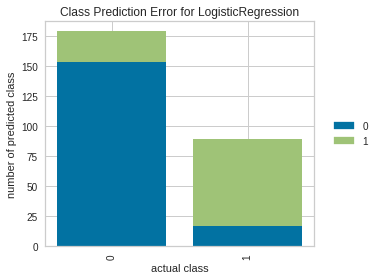

In [40]:
plot_model(tune_lr_acc, plot = 'error')

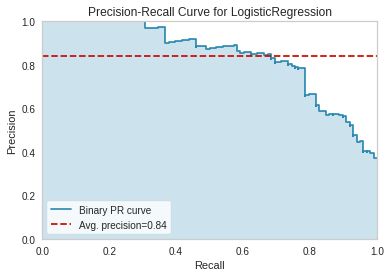

In [41]:
plot_model(tune_lr_acc, plot = 'pr')

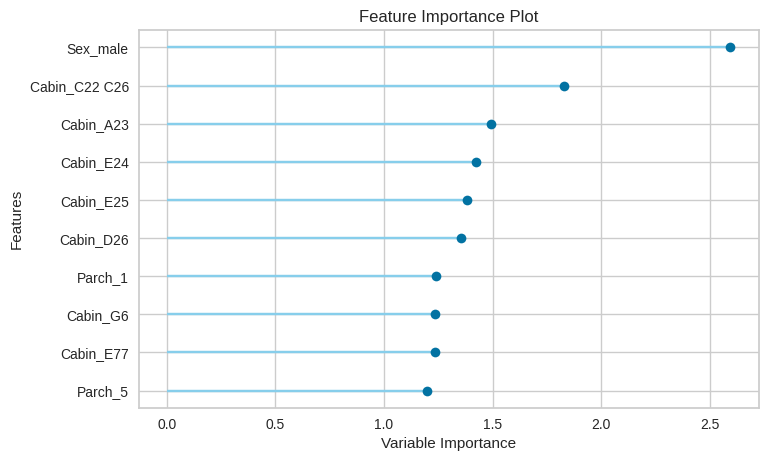

In [42]:
plot_model(tune_lr_acc, plot = 'feature')

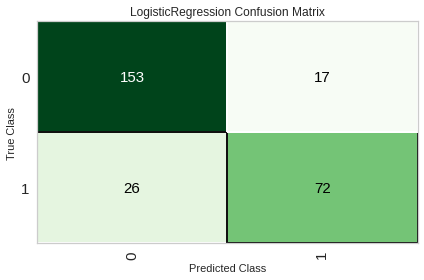

In [43]:
plot_model(tune_lr_acc, plot = 'confusion_matrix')

Vamos a evaluar este modelo con evaluate_model()

In [44]:
evaluate_model(tune_lr_acc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Tomamos el conjunto de test y hacemos las pruebas.

In [45]:
test = pd.read_csv('./test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
predicciones = predict_model(tune_lr_acc, data = test)
predicciones

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8827
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5711
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8617
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8987
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.7511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.9067
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.8637
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9282
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.9067


In [47]:
predicciones_submission = predicciones[['PassengerId', 'Label']]
predicciones_submission.head()

,PassengerId,Label
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [48]:
submission = pd.read_csv('./gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
submission['PassengerId'] = predicciones_submission['PassengerId']
submission['Survived'] = predicciones_submission['Label']
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Terminamos creando el csv para Kaggle. 

In [50]:
submission.to_csv('titanic1.csv', index = False)

# ACTIVIDAD 2

**Pregunta 1 - ¿Te costó esfuerzo aprender el presente tema?**

Personalmente este tema no me ha resultado muy complicado de aprender. Creo que PyCaret es una herramienta muy útil y al menos lo que hemos visto en esta lección no me ha parecido excesivamente complejo.

**Pregunta 2 - ¿Qué te ha llamado la atención de PyCaret?**

Me ha llamado la atención lo sencillo que es entrenar y sobretodo comparar diferentes modelos de ML. En mi caso, en la Lección 5 de Fundamentos de Big Data intenté mejorar la precisión del clasificador del Titanic Dataset y tuve que entrenar y comparar manualmente los diferentes clasificadores que utilicé. 

Con PyCaret, se puede usar simplemente compare_models() y obtener rápidamente muchas métricas que nos pueden ayudar a elegir el mejor modelo en cada caso. Considero que esto simplifica significativamente las tareas que conlleva buscar un modelo adecuado para cada situación.

**Pregunta 3 - ¿Notas que es más simple haciéndolo así que como se
hizo en Fundamentos de Big Data? Si opinas diferente la respuesta no
es correcta/incorrecta, siempre y cuando argumentes tu respuesta.**

Sí, como ya he comentado considero que es mucho más simple y rápido de esta forma. En cualquier caso, considero que también es importante haber visto como se entrenan "manualmente" los modelos y se manipula el dataset para entender bien que estamos haciendo.

**Pregunta 4 - Busca más herramientas AutoML que existan y enumera
alguna (simplemente queremos que te familiarices con ello, nada
más).**

Dos herramientas de AutoML podrían ser:

Auto-Keras: Basado en la librería Keras, permite automatizar la busqueda de los parámetros óptimos para un dataset.

Auto-Sklearn: Construido a partir de scikit-learn, permite también buscar el algoritmo y los parámetros óptimos para cierto dataset.

# ACTIVIDAD 3

Para hablar del siginificado AUC tenemos que definir en primer lugar la curva ROC.

La curva ROC (receiver operating characteristic curve o característica operativa del receptor), es un gráfico que muestra el rendimiento de un modelo de clasificación para todos los umbrales de clasificación. Esta curva tiene dos parámetros:

- Ratio de Verdaderos Positivos: $TPR = \frac{TP}{TP + FN}$
- Ratio de Falsos Positivos: $FPR = \frac{FP}{FP + TN}$

La curva ROC dibuja estas dos magnitudes una frente a la otra para diferentes umbrales de precisión, obteniendo una curva como la que aparece a continuación.

![title](ROCCurve.svg)

El AUC o Area Under Curve (área bajo la curva) no es más que la medida del área debajo de esta curva (la integral desde FPRate = 0 hasta FPRate = 1). En esencia, en problemas de clasificación binaria, el AUC nos da una medida de "como de bueno" es nuestro modelo haciendo predicciones de una clase 0 como 0 y de una clase 1 como 1. Contra más cercano esté el AUC de 1 más preciso será nuestro modelo en esta tarea de clasificación binaria. 

Propongo dos ejemplos.

![title](1.png)

En esta primera curva, vemos como TPR vale 1 en todo momento. Calcular el área bajo esta curva sería como calcular el área de un cuadrado de lado 1, por tanto, obtendríamos un AUC de 1, es decir, estaríamos en una situación ideal en la que el modelo distingue perfectamente entre las dos clases.

![title](2.png)

En esta segunda imágen tenemos una situación un tanto menos ideal pero sí más realista. Si calculásemos la integral bajo la curva obtendríamos un AUC < 1, lo que implicaría que nuestro modelo no distingue perfectamente entre ambas clases.

Fuentes:

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419

# ACTIVIDAD 4

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

En nuestro caso, al tratar un problema de clasificación binaria, nos encontraríamos frente a una matriz 2x2 que representaría veraderos positivos, falsos positivos, falsos negativos y veraderos negativos, tal y como aparece en la imágen a continuación.

![title](3.png)

De esta forma podemos visualizar rápidamente los siguientes casos:

- Fila 1 Columna 1 -> Verdadero Positivo: Es decir, datos que son de la clase 1 y se han clasificado como 1.
- Fila 1 Columna 2 -> Falso Positvo: Es decir, datos que son de la clase 0 y se han clasificado como 1.
- Fila 2 Columna 1 -> Falso Negativo: Es decir, datos que son de la clase 1 y se han clasificado como 0.
- Fila 2 Columna 2 -> Verdadero Negativo: Es decir datos que son de la clase 0 y se han clasificado como 0.

Si sumamos la diagonal principal (TP + TN) obtenemos los aciertos del modelo. Si sumamos la otra diagonal (FN + FP) obtenemos los fallos del modelo. En definitiva, esta matriz nos permite visualizar rápidamente el rendimiento del modelo y hacer comparaciones visuales entre diferentes modelos para un mismo problema de clasificación.

# ACTIVIDAD 5

Adjunto con la actividad un pantallazo con el resultado de la predicción generada en la actividad 1